## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [1]:
from src.MLCD.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot, make_polytope_plot, accuracy, plot_loss

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'straight_separatrix'
- 'radial_2labels'
- 'radial_3labels'
- 'curved_separatrix'
- 'EMT'
- 'periodic'
- 'ellipsoidal_kd' for k = 2, 3, 4, 5, 6
- 'DSGRN_2d_network'
- 'iris'
- 'leslie'
- 'periodic_3labels'

In [2]:
system = 'straight_separatrix'

N = 10 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # threshold in (0, 1/2) used to label cubes

epochs = 20 # number of times that the data is cycled through during neural network training

config_file = f'config/{system}.txt'

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [3]:
model_filename = 'model'
model, train_loss_list, test_loss_list = train_classifier(system, N, epochs, model_filename, config_file)
accuracy = accuracy(system, model, labeling_threshold, config_file)

Epoch 1/20
Test loss: 0.020963
Train loss: 0.013330
Epoch 2/20
Test loss: 0.010677
Train loss: 0.010523
Epoch 3/20
Test loss: 0.007903
Train loss: 0.008109
Epoch 4/20
Test loss: 0.007136
Train loss: 0.007702
Epoch 5/20
Test loss: 0.005891
Train loss: 0.004010
Epoch 6/20
Test loss: 0.004971
Train loss: 0.004552
Epoch 7/20
Test loss: 0.004781
Train loss: 0.002892
Epoch 8/20
Test loss: 0.004179
Train loss: 0.002335
Epoch 9/20
Test loss: 0.003860
Train loss: 0.003577
Epoch 10/20
Test loss: 0.003549
Train loss: 0.002528
Epoch 11/20
Test loss: 0.003467
Train loss: 0.000997
Epoch 12/20
Test loss: 0.003189
Train loss: 0.006876
Epoch 13/20
Test loss: 0.003002
Train loss: 0.000000
Epoch 14/20
Test loss: 0.003221
Train loss: 0.002662
Epoch 15/20
Test loss: 0.002732
Train loss: 0.001633
Epoch 16/20
Test loss: 0.002684
Train loss: 0.000000
Epoch 17/20
Test loss: 0.002623
Train loss: 0.002425
Epoch 18/20
Test loss: 0.002840
Train loss: 0.001243
Accuracy using labeling threshold on test dataset:  0.9

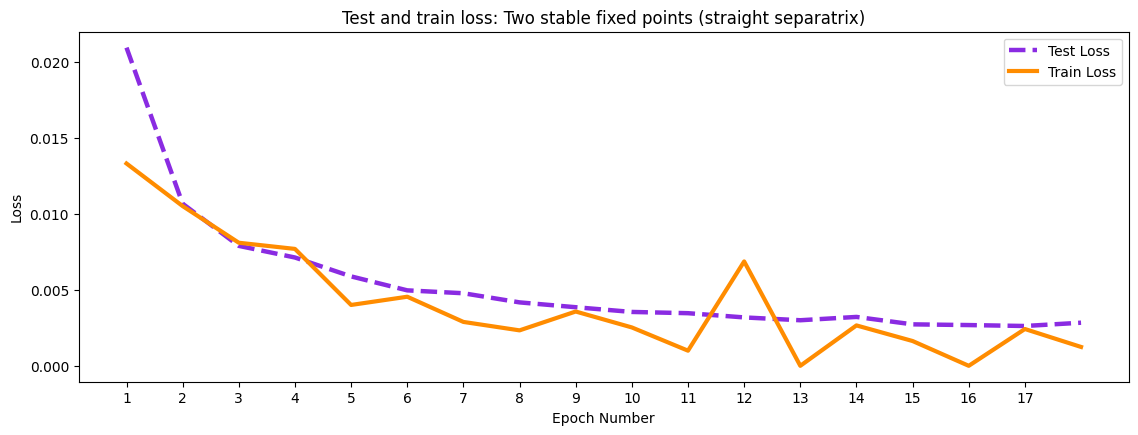

<Figure size 640x480 with 0 Axes>

In [4]:
file_name = 'loss'
plot_loss(system, test_loss_list, train_loss_list, file_name, config_file)

### Compute homology of labeled regions of the MLCD obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

In [5]:
labeling_threshold = 0.3
hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model, config_file)

Betti numbers of label 0 region: [1, 0, 0]
Betti numbers of label 1 region: [1, 0, 0]
Betti numbers of uncertain region: [1, 0, 0]
Number of cubes labeled:  55


### Plot MLCD

The MLCD overlays points of phase space colored according to the value of the network.

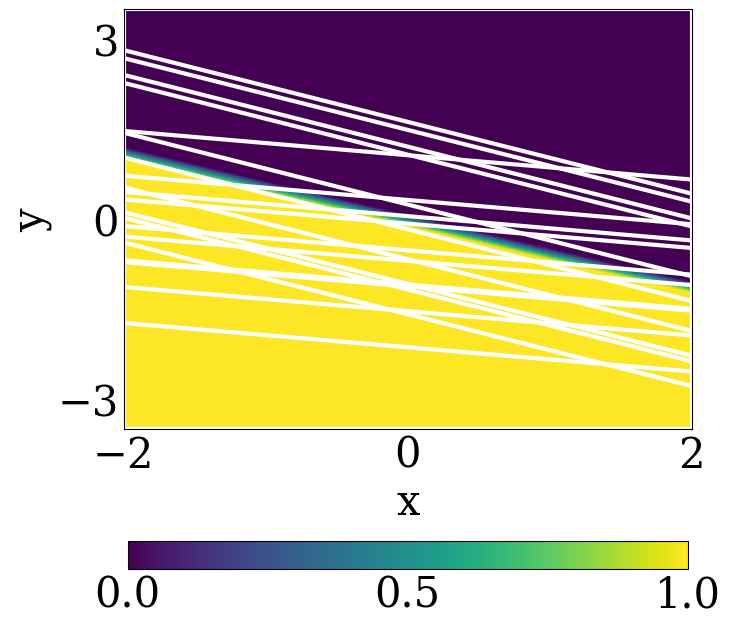

In [6]:
file_name = 'decomposition_plot'
make_decomposition_plot(system, hyperplane_list, model, file_name, config_file)

### Plot labeled cubes

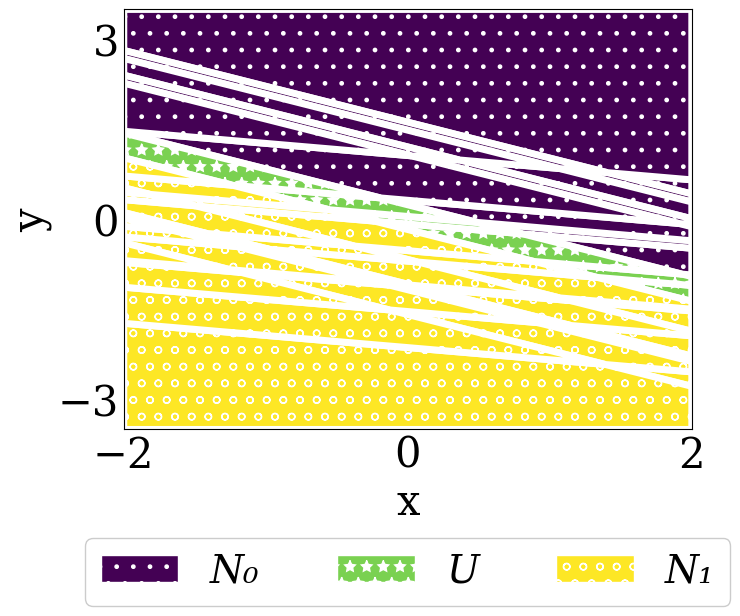

In [7]:
file_name = 'polytope_plot'
make_polytope_plot(system, cube_list, file_name, config_file)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files in the folder ```config```. 

The following sentence if false at the moment. This computation used the data available at https://github.com/begelb/attractor-id-data. To use a local copy of data, change the parameter ```using_local_data``` to ```True``` and change the paths following ```train_data_file``` and ```test_data_file``` in the configuration file to the appropriate paths.